In [1]:
import numpy as np
import pandas as pd

from luwiji.recommendation_system import illustration

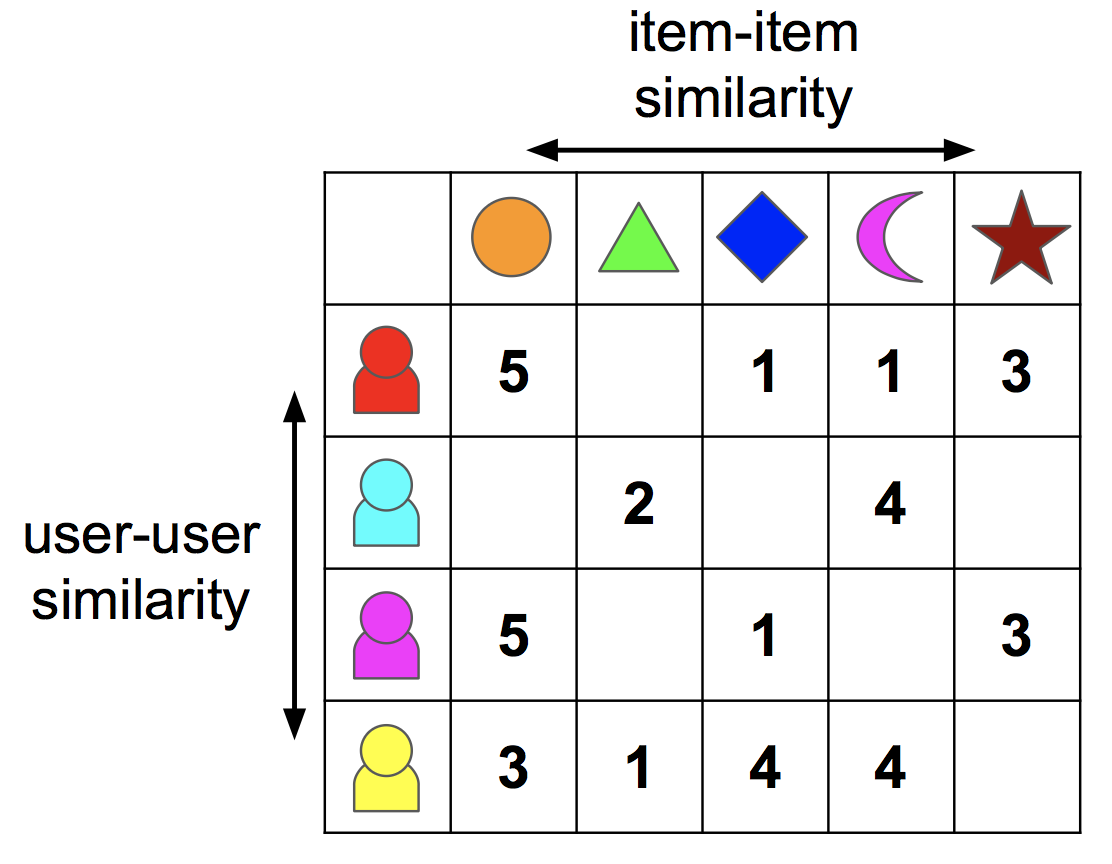

In [2]:
illustration.collaborative

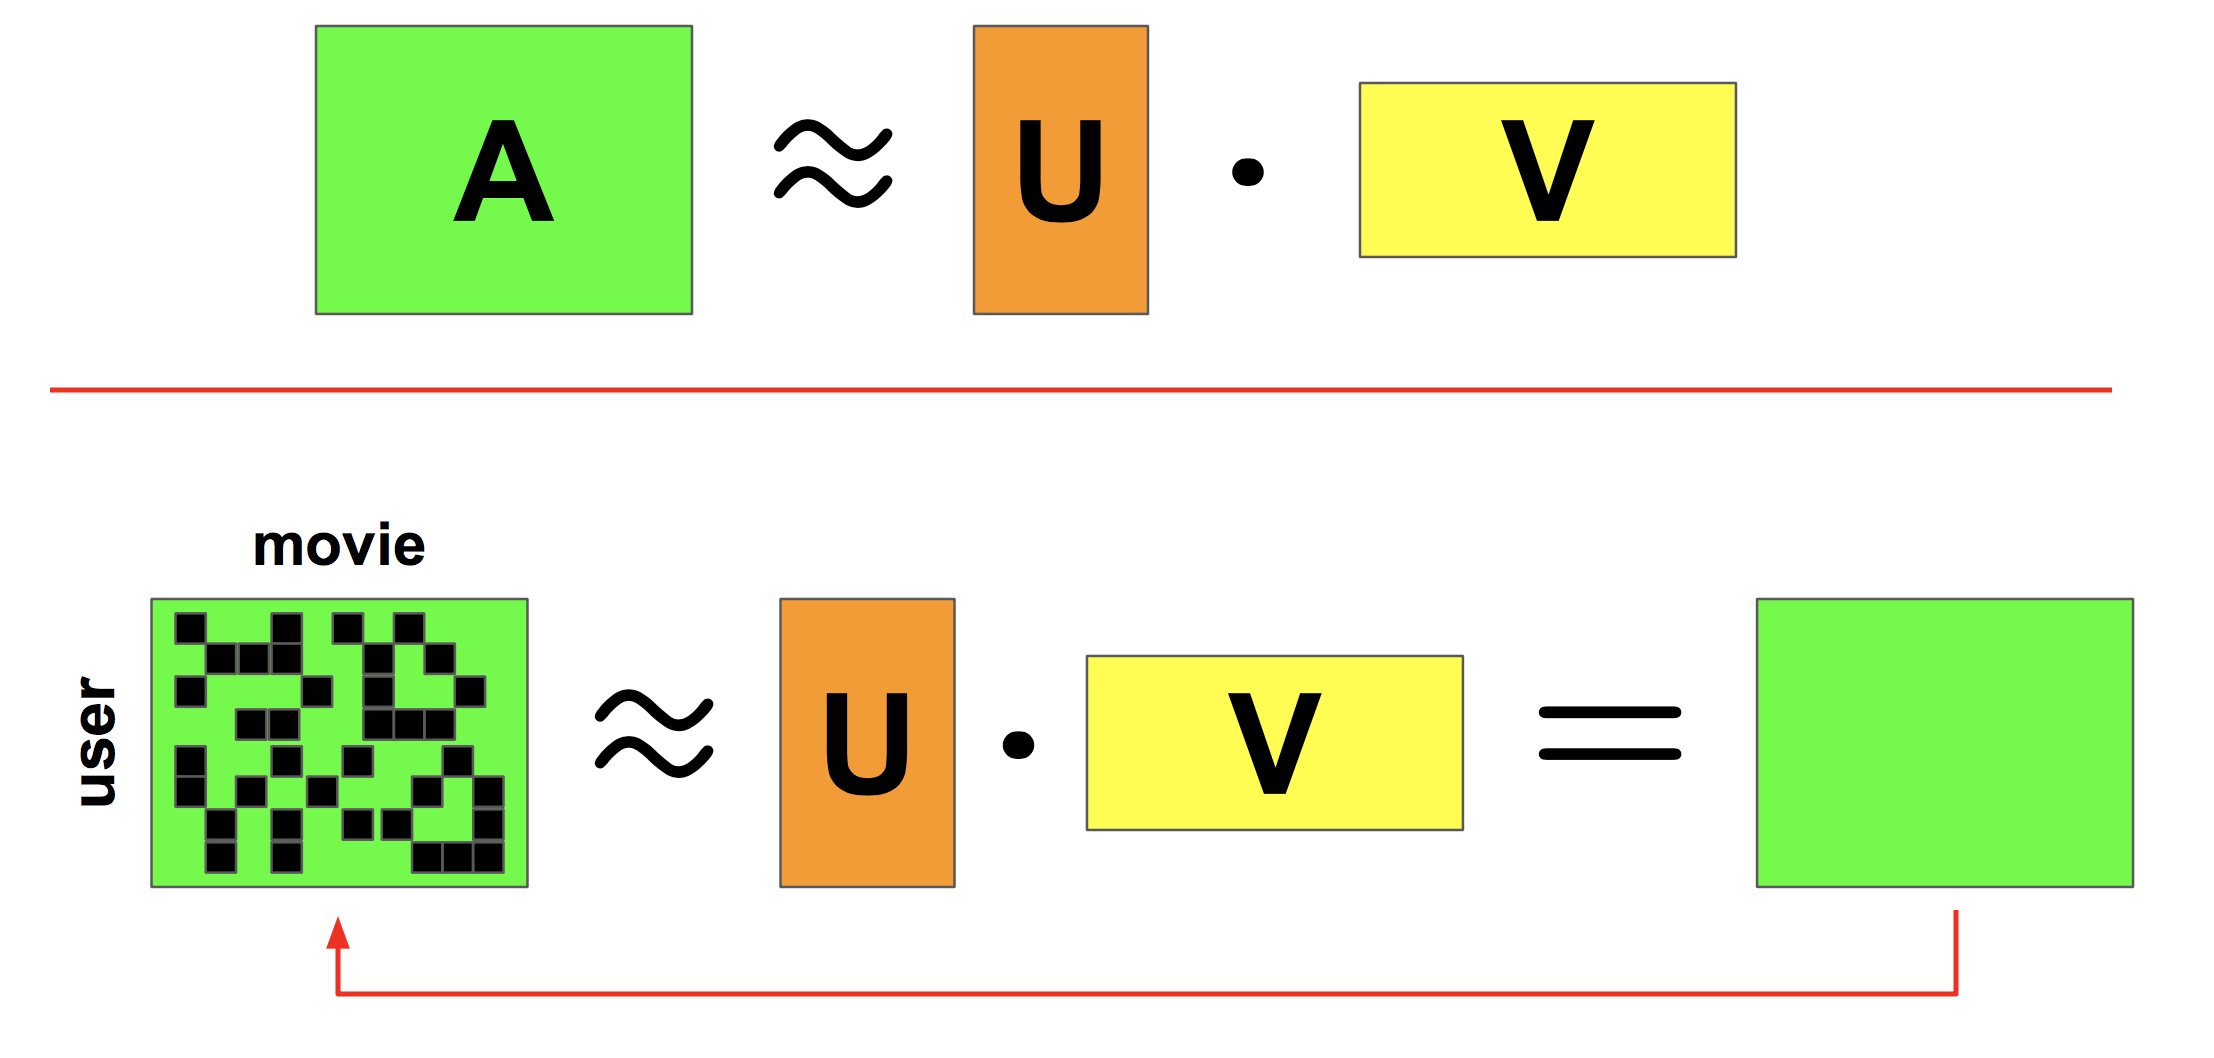

In [3]:
illustration.svd

# Import user rating

In [4]:
df = pd.read_csv("data/collaborative_filtering.csv")
df.head()

,userId,movie,rating
0,1,One Flew Over the Cuckoo's Nest (1975),5
1,1,James and the Giant Peach (1996),3
2,1,My Fair Lady (1964),3
3,1,Erin Brockovich (2000),4
4,1,"Bug's Life, A (1998)",5


# Training

In [12]:
from surprise import Reader, Dataset, NMF
from surprise.model_selection import cross_validate

In [8]:
data = Dataset.load_from_df(df, Reader())
trainset = data.build_full_trainset()

In [13]:
model = NMF()
model.fit(trainset)

In [14]:
model.predict(1, "My Fair Lady (1964)")

Prediction(uid=1, iid='My Fair Lady (1964)', r_ui=None, est=4.314871836669478, details={'was_impossible': False})

# Prediksi Rating pada film yang belum ditonton

In [15]:
user_id = 1

### kita mau dapat semua film yang belum ditonton

In [16]:
all_movies = df.movie.unique()
all_movies

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

In [21]:
watched = df[df.userId == user_id].movie
watched.head()

0    One Flew Over the Cuckoo's Nest (1975)
1          James and the Giant Peach (1996)
2                       My Fair Lady (1964)
3                    Erin Brockovich (2000)
4                      Bug's Life, A (1998)
Name: movie, dtype: object

In [25]:
not_watched = [movie for movie in all_movies if movie not in watched.tolist()]
not_watched

['Shine (1996)',
 'Verdict, The (1982)',
 'Shall We Dance? (Shall We Dansu?) (1996)',
 'Courage Under Fire (1996)',
 'Untouchables, The (1987)',
 'Mission: Impossible (1996)',
 'Few Good Men, A (1992)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Rebel Without a Cause (1955)',
 'Total Recall (1990)',
 'Hustler, The (1961)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'U.S. Marshalls (1998)',
 'Jackal, The (1997)',
 'GoodFellas (1990)',
 'Gladiator (2000)',
 'Double Jeopardy (1999)',
 'Yojimbo (1961)',
 'Ran (1985)',
 'Cliffhanger (1993)',
 'Snake Eyes (1998)',
 'Backdraft (1991)',
 'Fisher King, The (1991)',
 'Mister Roberts (1955)',
 'Day the Earth Stood Still, The (1951)',
 'Hunt for Red October, The (1990)',
 'Outbreak (1995)',
 'Simon Birch (1998)',
 'Stand and Deliver (1987)',
 "Breakfast at Tiffany's (1961)",
 'Maverick (1994)',
 'Stand by Me (1986)',
 'Green Mile, The (1999)',
 'Lost World: Jurassic Park, The (1997)',
 'Gandhi (1982)',
 'Strictly Ballroom (

## Prediksi Rating

In [27]:
score = [model.predict(user_id, movie).est for movie in not_watched]
score

[4.120950076932881,
 4.065270789579034,
 4.5963539682980965,
 3.681860534945873,
 4.305996572979093,
 3.5883953352051856,
 4.184278641735687,
 3.6366499272078623,
 4.292990427077863,
 3.8504700085967922,
 4.44247536881111,
 3.9905092779302755,
 3.4328803699895136,
 3.31877513792653,
 4.664444364218267,
 4.375304570016508,
 3.318633367595185,
 5,
 4.643802468656722,
 3.340248149282756,
 3.0855688116176965,
 3.672893918135504,
 3.961463743872397,
 4.448903610468192,
 4.555008823955015,
 4.370185994135039,
 3.5640317111512396,
 3.9051530668619368,
 4.084925185609785,
 4.346005253580005,
 3.715115561373166,
 4.205413957887027,
 4.591784162937967,
 3.3174907780859453,
 4.3408446780110905,
 4.0922658808208645,
 3.79091338749119,
 3.8584161386665747,
 3.0382968840398537,
 4.376158228038253,
 3.7685373518587744,
 3.5856433158614847,
 4.213307802640399,
 4.1586365604594855,
 4.400950981819753,
 3.2785949030546453,
 4.407578263925787,
 4.128255104622822,
 4.687893382688954,
 3.882584338802566,
 

# Rekomendasi

In [29]:
recommendation = pd.DataFrame({"movie": not_watched, "pred_score": score})
recommendation.sort_values("pred_score", ascending=False)

,movie,pred_score
1235,For All Mankind (1989),5.0
17,Yojimbo (1961),5.0
3359,"Apple, The (Sib) (1998)",5.0
3511,Mamma Roma (1962),5.0
3576,Smashing Time (1967),5.0
...,...,...
3502,Windows (1980),1.0
3326,"Loves of Carmen, The (1948)",1.0
3650,White Boys (1999),1.0
2195,Diebinnen (1995),1.0
